<a href="https://colab.research.google.com/github/lokesssh/DSML/blob/main/Jamboree_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement** :
Jamboree has introduced a feature to estimate the probability of graduate admission into Ivy League colleges from an Indian applicant's perspective. To enhance the accuracy and relevance of this feature, we aim to:

Analyze historical admission data to identify the most influential factors in the admission decision.

Understand how these factors interact and influence each other.

Build a predictive model that can estimate a candidate’s chances of admission based on their profile.

In [3]:
#Exploratory Data Analysis
import pandas as pd

#Load data
data = pd.read_csv('/content/jumboree.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Checking for null values
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [5]:
#The Serial No column doesnt impact anything in analysing the chance of admit as it is just a unique identification number for a student
data.drop('Serial No.',axis=1, inplace=True)
# chekcing no of records and columns present in the data
data.shape

(500, 8)

In [6]:
#Type of variables present
data.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Based on the data  

1.   GRE,TOEFL and university rating looks like integer columns
2.   SOP, LOR and CGPA looks like float columns with decimal numbers
3.   Research is categorical column


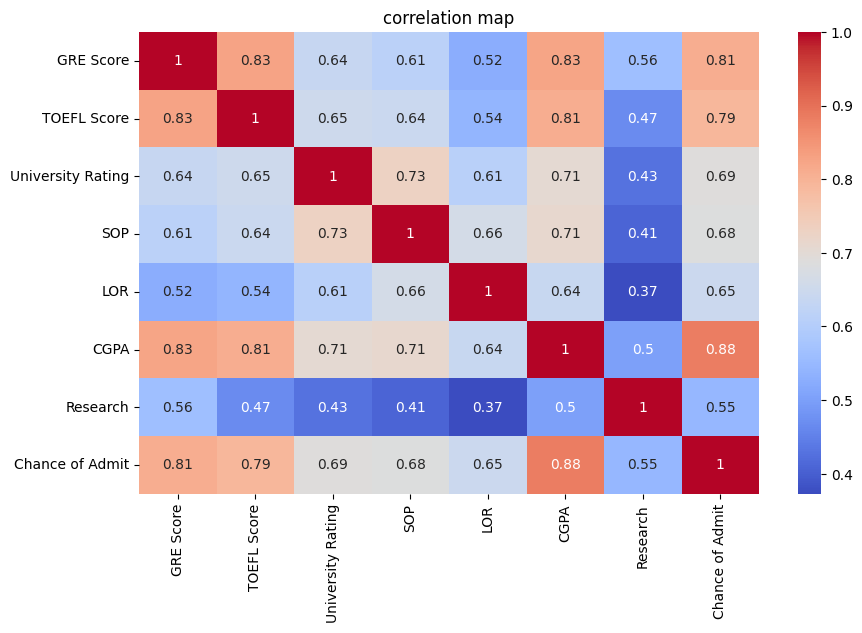

In [10]:
#Plotting Correlation map to have better understanding on relation between any 2 given feature including the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')
plt.title('correlation map')
plt.show()

Observations from the HeatMap

1.   GRE Score has highest impact on Chance of Admit
2.   Research has lowest impact but still considerable impact on Chance of Admit
3.   Almost every feature looks significant in predicting the target variable



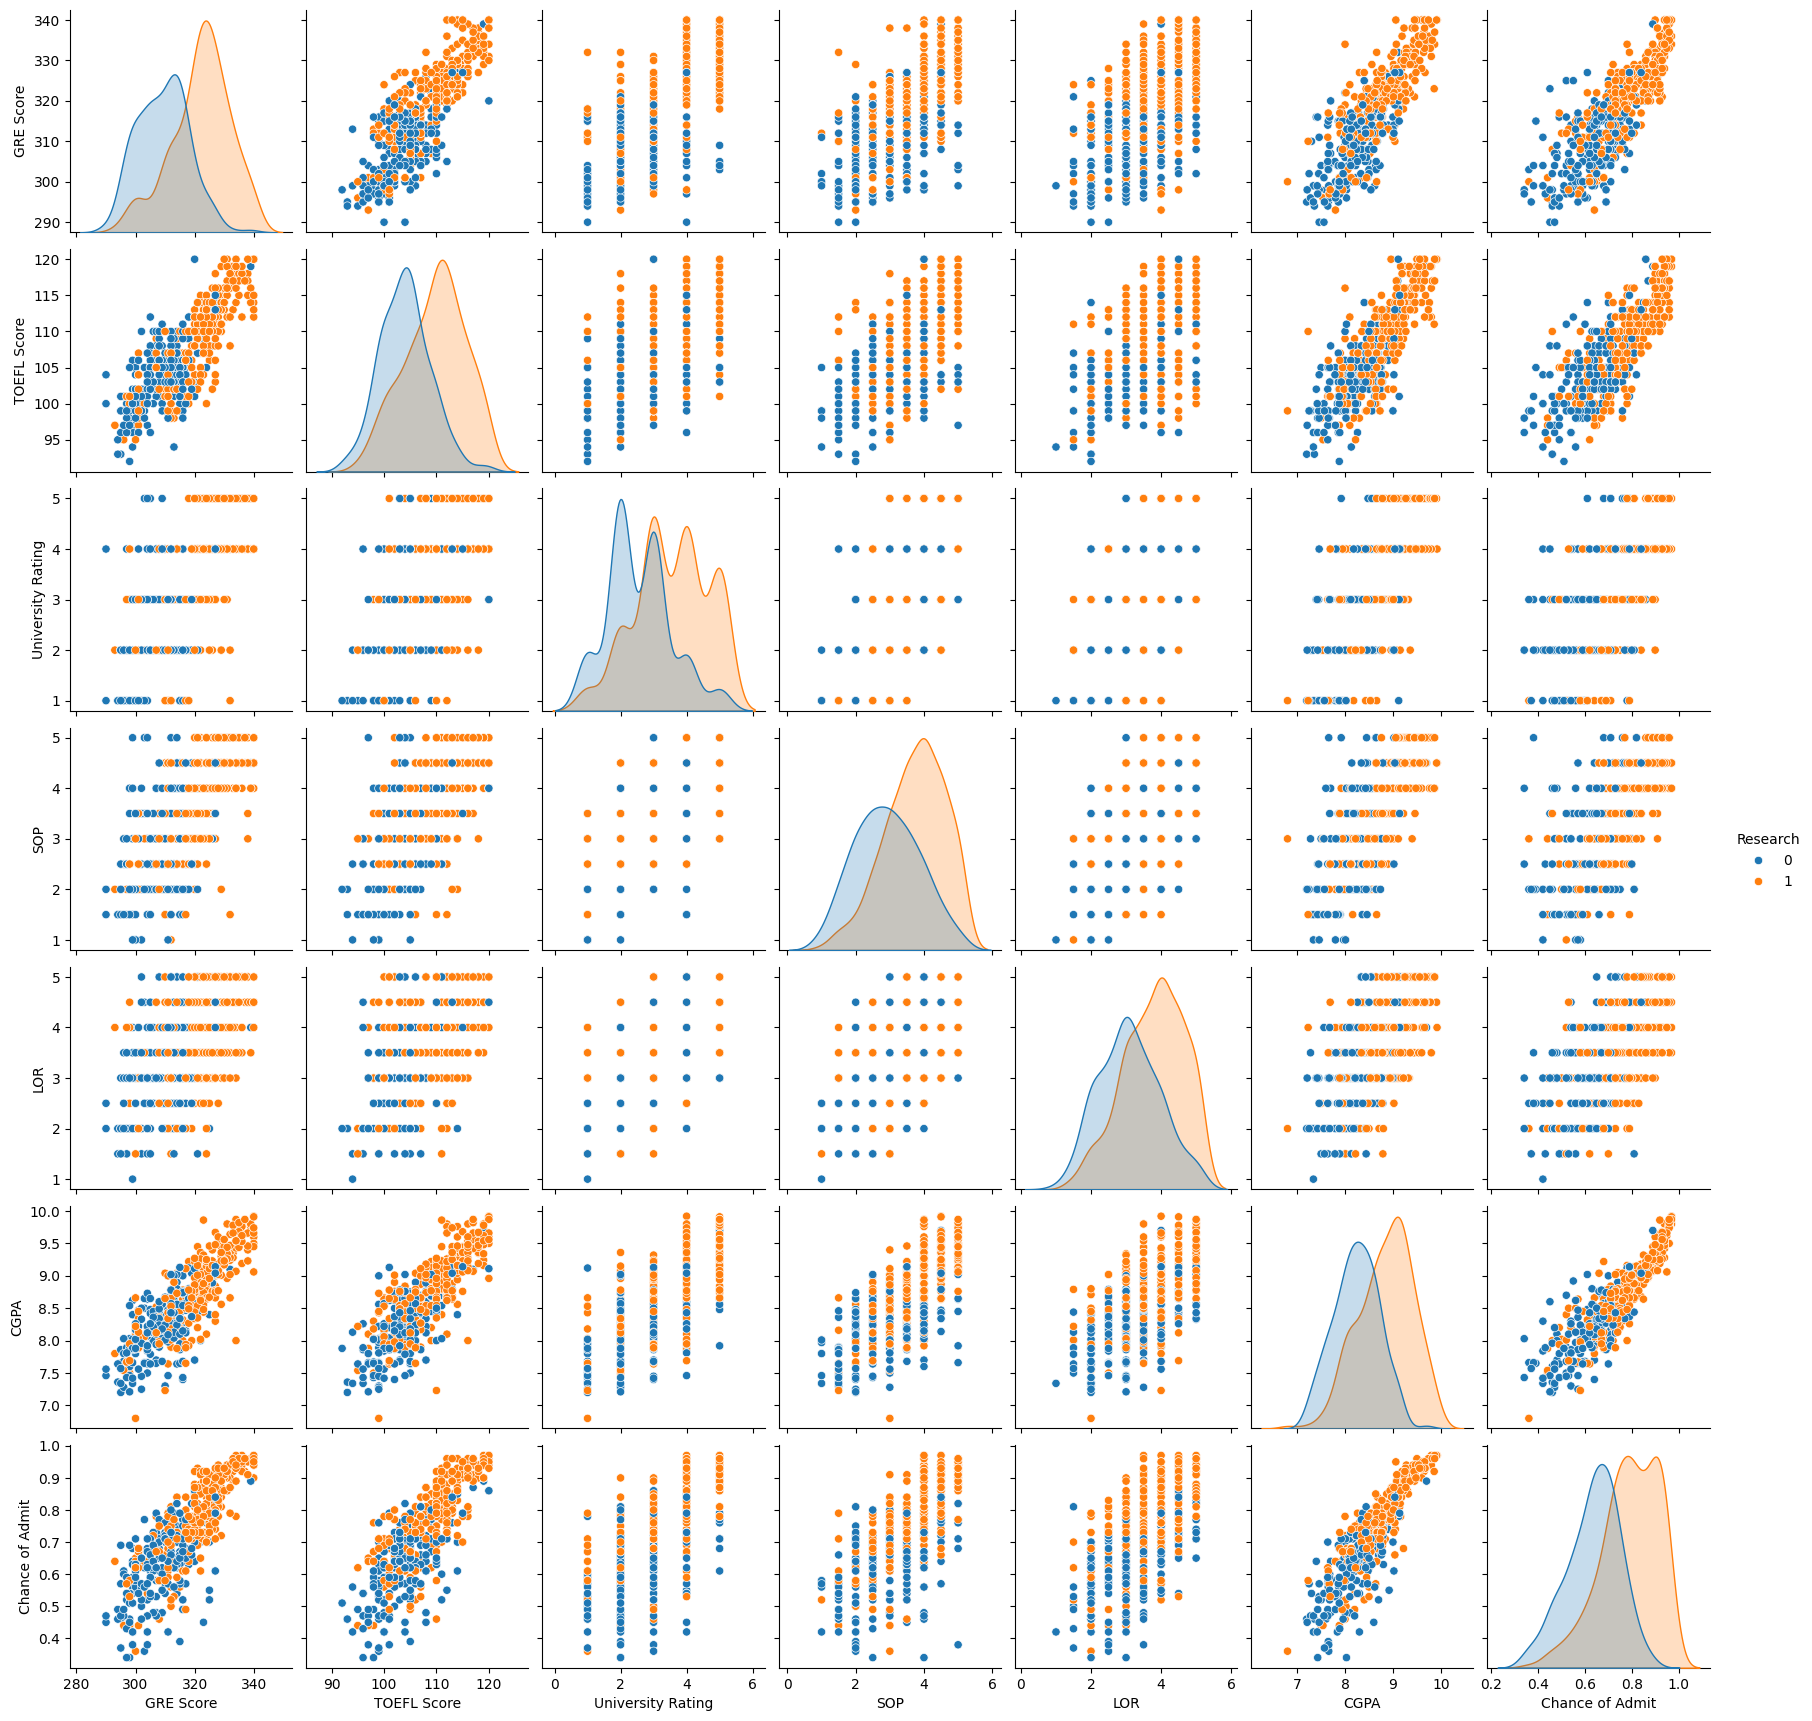

In [11]:
sns.pairplot(data,hue='Research')

1. Research vs Chance of Admit
Orange dots (Research = 1) are generally clustered at higher Chance of Admit.

Students with research experience tend to have better chances, especially when CGPA and GRE are high.

2. CGPA Correlation
Strong positive correlation with Chance of Admit.

Clear linear trend: Higher CGPA → Higher Chance.

3. GRE & TOEFL Scores
Both are positively correlated with Chance of Admit.

Students with Research tend to have slightly higher scores in GRE and TOEFL.

4. University Rating, SOP, LOR
Discrete scatter due to low value range.

Weak/moderate relation to Chance of Admit, though higher ratings + research tilt chances up.

5. Research Influence
In most plots, Research = 1 (orange) skews toward higher academic indicators and higher admission chances.




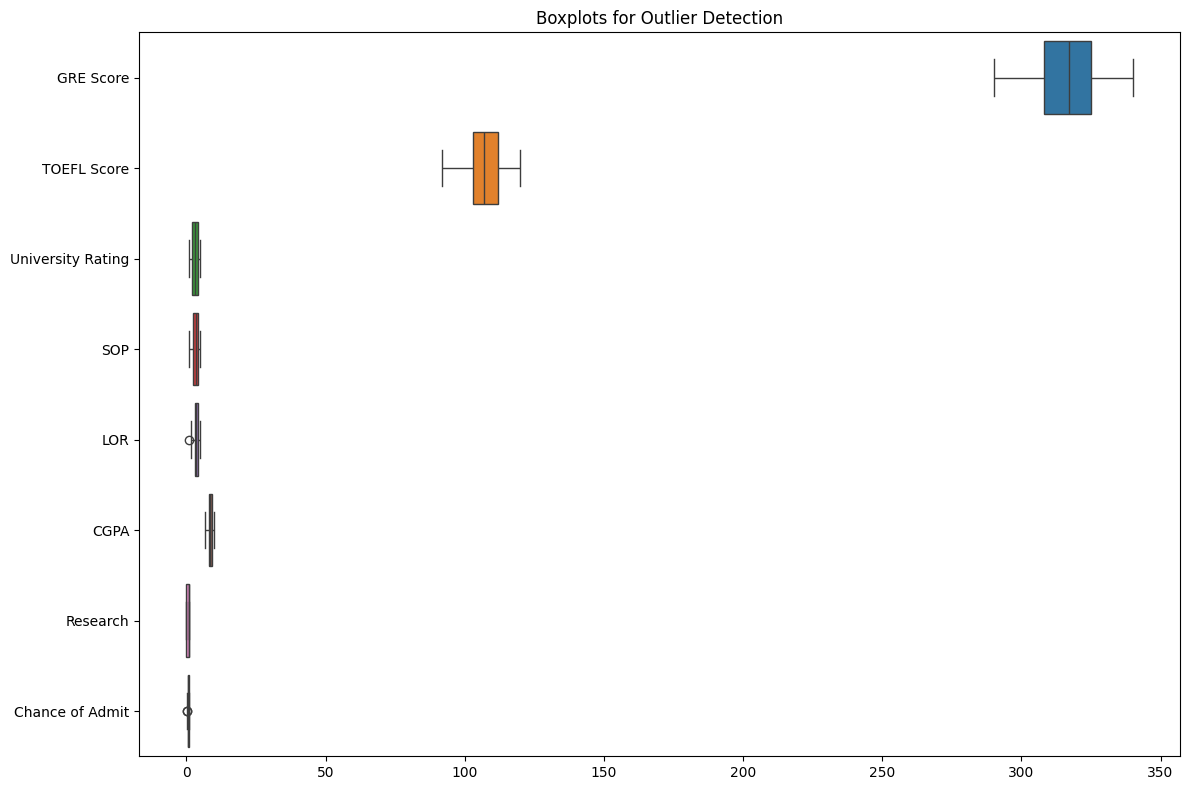

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include='number'), orient='h')
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

For LOR and Chance of Admit, outliers seem mild and may contain meaningful patterns (e.g., poor LOR affecting admit chances).

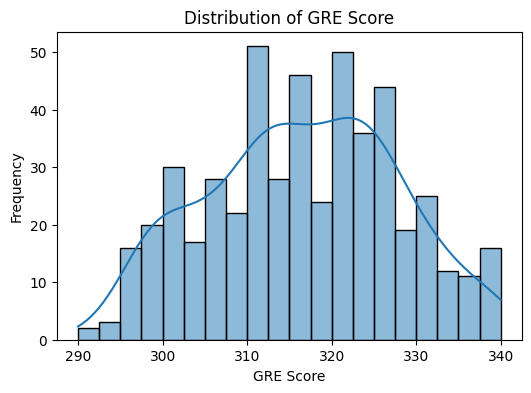

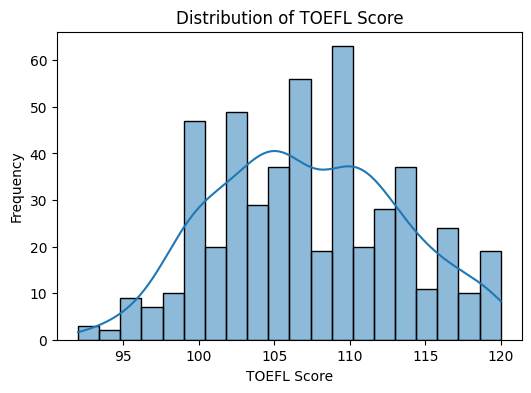

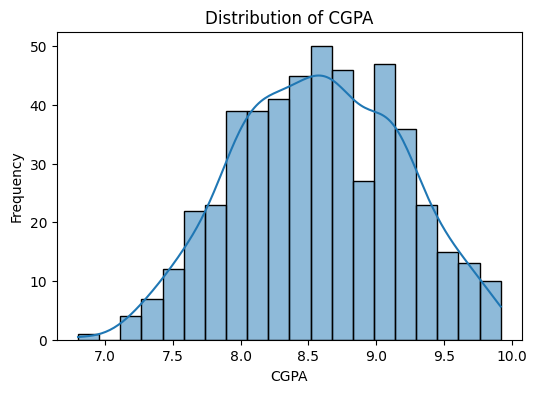

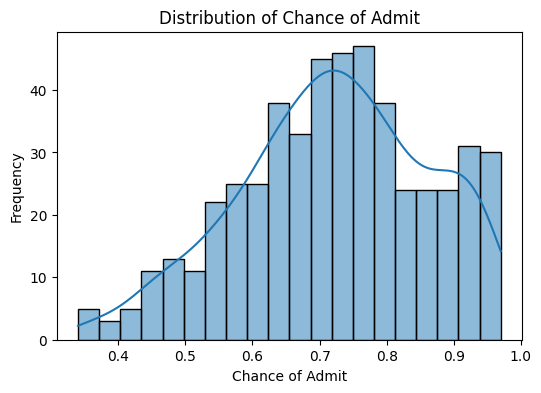

In [15]:
continuous_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



1.   GRE looks slightly right skewed, most of the students score in between 305-325 very less students scored under 300 and 330
2.   TOEFL looks slightly right skewed , no need for transformation
3.   CGPA looks slightly right skewed, no need for tranformation



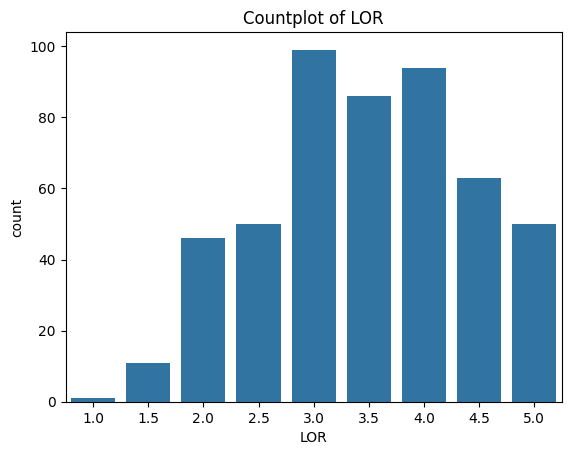

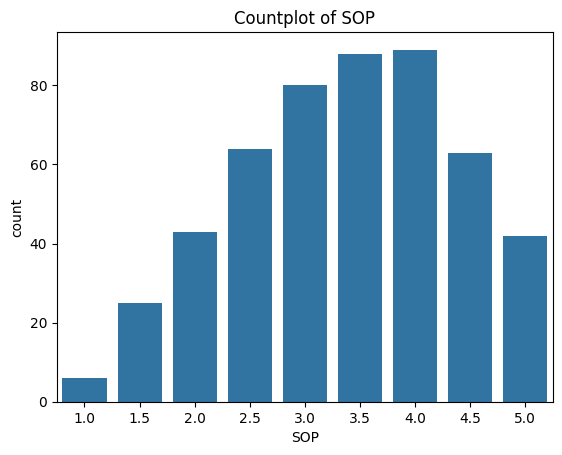

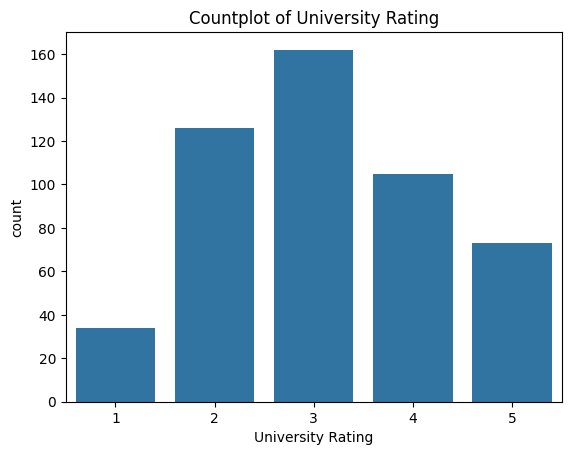

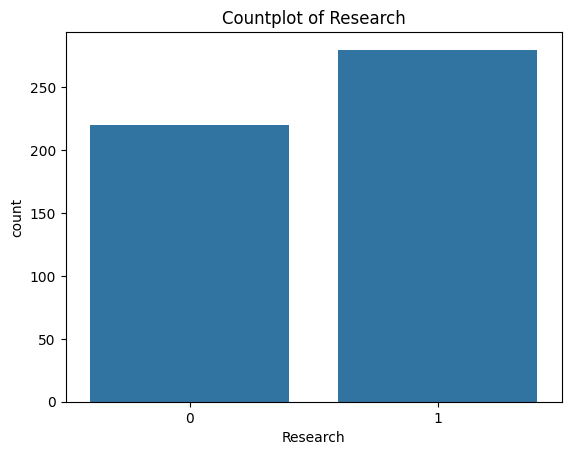

In [17]:
# LOR
sns.countplot(x='LOR', data=data)
plt.title('Countplot of LOR')
plt.show()

# SOP
sns.countplot(x='SOP', data=data)
plt.title('Countplot of SOP')
plt.show()

# University Rating
sns.countplot(x='University Rating', data=data)
plt.title('Countplot of University Rating')
plt.show()

# Research
sns.countplot(x='Research', data=data)
plt.title('Countplot of Research')
plt.show()

**LOR** & **SOP** :
Most frequent values: LOR and SOP scores of 3.0 to 4.0 are the most common, indicating that most applicants have moderate to strong letters of recommendation.

Low frequency: LOR and SOP = 1.0 and 1.5 are rare, meaning very few students had weak recommendations.

Insight: The distribution is right-skewed, suggesting that strong LORs  and SOPsare more common among applicants.

Implication: Since LOR and SOP are ordinal, keeping it as a categorical feature is fine. we can apply target encoding to reflect the impact of LOR on admission chance.

**Research** : Both 0 and 1 are having considerbale count among the applicants

Since it is already binary no need of any further encoding


In [12]:
x = data.drop('Chance of Admit',axis = 1)
y = data['Chance of Admit']
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [16]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_tr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']] = scaler.fit_transform(X_tr[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']])
X_tr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,-0.537360,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,0
438,0.163640,0.449257,-1.802983,-0.845045,0.009331,-0.045935,1
475,-1.413610,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,0
58,-1.413610,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,1
380,0.514140,-0.519491,-0.054636,0.140430,0.542546,0.449323,1
...,...,...,...,...,...,...,...
255,-0.800235,0.449257,0.819538,0.633168,1.075760,-0.326582,0
72,0.426515,0.610715,1.693711,1.618644,1.608974,1.456349,1
396,0.777014,-0.035117,-0.054636,-0.352308,0.009331,0.895056,1
235,0.864639,0.610715,1.693711,1.125906,0.542546,1.093159,1


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_tr, y_tr)

#scaling the test data
X_test[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']] = scaler.fit_transform(X_test[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA']])

y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.0034312305871541547
R² Score: 0.8223173016853527


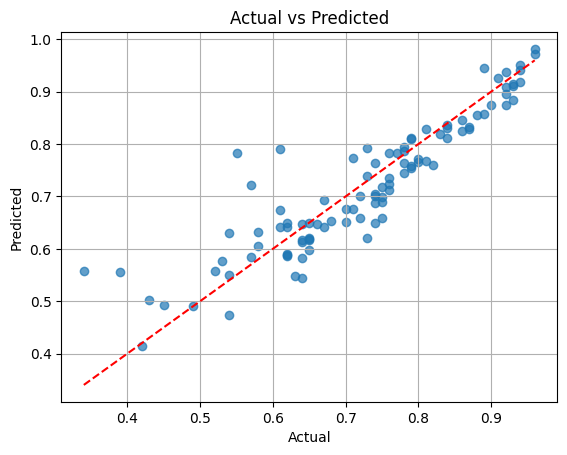

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid()
plt.show()